<a href="https://colab.research.google.com/github/tsrtarun/DL-Problem-Solving-Techniques/blob/main/Importance_and_implication_of_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Unscaled Dataset Generation for Binary Classification**

In [2]:

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 200

# Generate features with different scales
X1 = np.random.normal(loc=50, scale=10, size=n_samples)  # Normally distributed with mean=50, std=10
X2 = np.random.uniform(low=1, high=100, size=n_samples)   # Uniformly distributed between 1 and 100
X3 = np.random.exponential(scale=5, size=n_samples)       # Exponentially distributed with scale=5

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature1': X1,
    'Feature2': X2,
    'Feature3': X3
})

# Generate binary target variable (binary classification)
threshold = np.mean(X1)  # Threshold for binary classification based on Feature1 mean

# Assign binary labels based on Feature1
data['Target'] = (X1 > threshold).astype(int)

# Display the first few rows of the DataFrame
print(data.head())


    Feature1   Feature2   Feature3  Target
0  67.640523  96.231701   6.559815       1
1  54.001572  29.922605  10.673512       1
2  59.787380  24.842049   1.590273       1
3  72.408932  10.929100   2.382579       1
4  68.675580   2.626533   2.344391       1


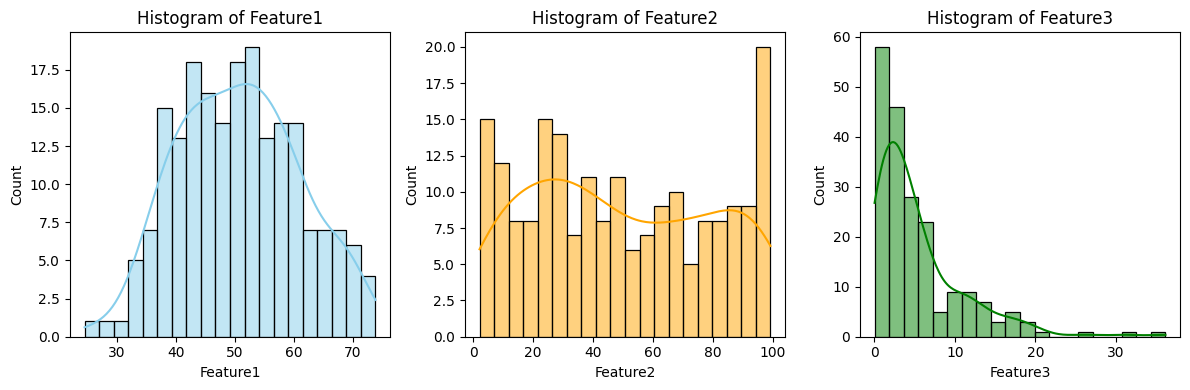

In [3]:
# Histograms of original features
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(data['Feature1'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Feature1')

plt.subplot(1, 3, 2)
sns.histplot(data['Feature2'], bins=20, kde=True, color='orange')
plt.title('Histogram of Feature2')

plt.subplot(1, 3, 3)
sns.histplot(data['Feature3'], bins=20, kde=True, color='green')
plt.title('Histogram of Feature3')

plt.tight_layout()
plt.show()


In [4]:
X = data.iloc[:,0:3]
y = data.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=3))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=0)

In [11]:
# Evaluate the model on the test data (X_test, y_test)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the validation accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.7750


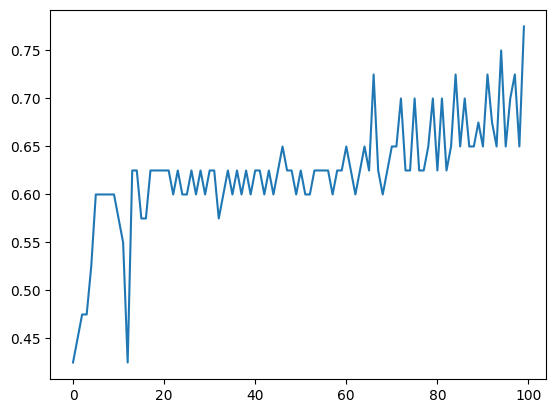

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

**Creating scaled data and Training and evaluating the model on scaled data**

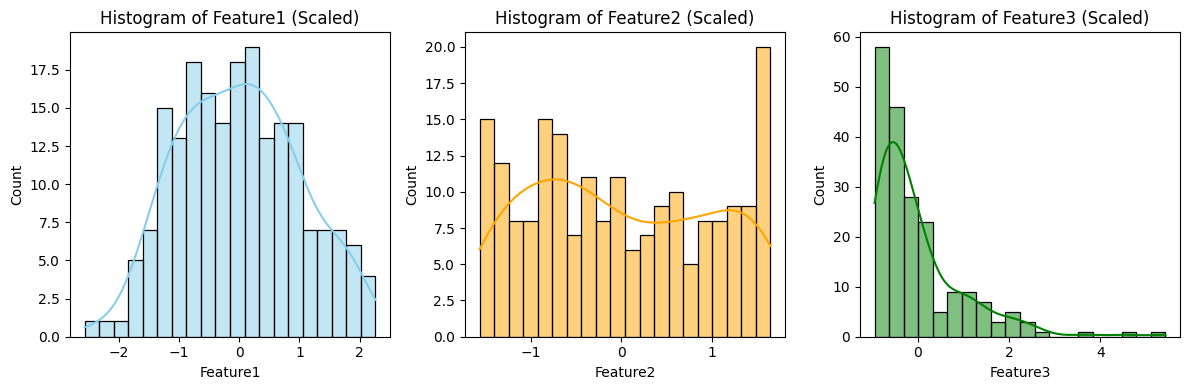

In [13]:
# Scale the features (Standardization) and visualizing the distribution of scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(data[['Feature1', 'Feature2', 'Feature3']])
data_scaled = pd.DataFrame(scaled_features, columns=['Feature1', 'Feature2', 'Feature3'])

# Histograms of scaled features
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(data_scaled['Feature1'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Feature1 (Scaled)')

plt.subplot(1, 3, 2)
sns.histplot(data_scaled['Feature2'], bins=20, kde=True, color='orange')
plt.title('Histogram of Feature2 (Scaled)')

plt.subplot(1, 3, 3)
sns.histplot(data_scaled['Feature3'], bins=20, kde=True, color='green')
plt.title('Histogram of Feature3 (Scaled)')

plt.tight_layout()
plt.show()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100, verbose=0)

In [16]:
# Evaluate the model on the test data (X_test, y_test)
loss, accuracy = model.evaluate(X_test_scaled,y_test, verbose=0)

# Print the validation accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.9750


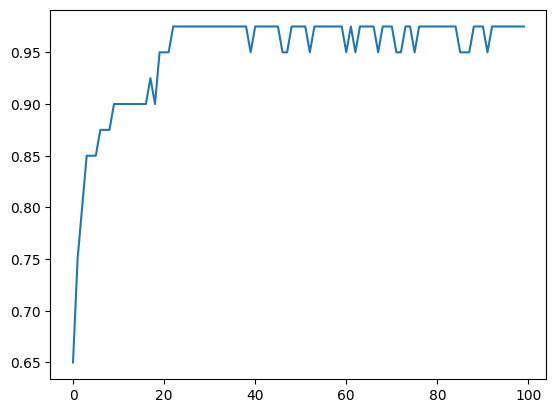

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])